## Importing Libraries

In [52]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

## Data Collection and Processing

In [54]:
# loading the dataset to pandas DataFrame
loan_dataset = pd.read_csv("Loan_dataset.csv")

In [55]:
# Impute missing values for Gender
loan_dataset['Gender'].fillna(loan_dataset['Gender'].mode()[0],inplace=True)

# Impute missing values for Married
loan_dataset['Married'].fillna(loan_dataset['Married'].mode()[0],inplace=True)

# Impute missing values for Self_Employed
loan_dataset['Self_Employed'].fillna(loan_dataset['Self_Employed'].mode()[0],inplace=True)

# Impute missing values for Dependents
loan_dataset['Dependents'].fillna(loan_dataset['Dependents'].mode()[0],inplace=True)

# Impute missing values for Creditability
loan_dataset['Creditability'].fillna(loan_dataset['Creditability'].mode()[0],inplace=True)

# Impute missing values for LoanAmount
loan_dataset['LoanAmount'] = loan_dataset['LoanAmount'].fillna(loan_dataset['LoanAmount'].mean())

# Impute missing values for Loan_Amount_Term
loan_dataset['Loan_Amount_Term'] = loan_dataset['Loan_Amount_Term'].fillna(loan_dataset['Loan_Amount_Term'].mean())




In [56]:
# label encoding
loan_dataset.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

In [57]:
# replacing the value of 3+ to 4
loan_dataset = loan_dataset.replace(to_replace='3+', value=4)

## Data Visualization

In [58]:
# convert categorical columns to numerical values
loan_dataset.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                 'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

In [59]:
#drop the uniques loan id
loan_dataset.drop('Loan_ID', axis = 1, inplace = True)

In [60]:
# separating the data and label
X = loan_dataset.drop(columns=['Loan_Status'],axis=1)
Y = loan_dataset['Loan_Status']

## Feature Importance

Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.

Feature importance is an inbuilt class that comes with Tree Based Classifiers, we will be using Extra Tree Classifier for extracting the top features for the dataset.

In [61]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,Y)

ExtraTreesClassifier()

<AxesSubplot:>

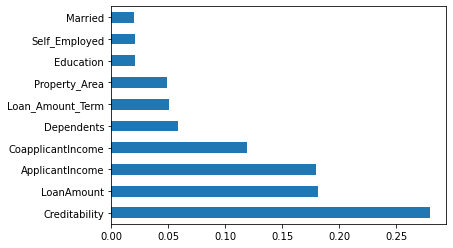

In [62]:
#plotting graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')



## Data Standardization

In [63]:
scaler=StandardScaler()

In [64]:
scaler.fit(X)

StandardScaler()

In [65]:
standardized_data=scaler.transform(X)

In [66]:
X=standardized_data
Y=loan_dataset['Loan_Status']

Train Test Split

In [67]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

## Model Training

SVM Model

In [68]:
from sklearn import svm
classifier = svm.SVC(kernel='linear')
classifier.fit(X_train,Y_train)
y_predict4=classifier.predict(X_test)

In [69]:
print("Evaluation Score:",f1_score(Y_test,y_predict4))
print("Accuracy:",accuracy_score(Y_test,y_predict4))
pd.crosstab(Y_test,y_predict4)

Evaluation Score: 0.8723404255319148
Accuracy: 0.8048780487804879


col_0,0,1
Loan_Status,,
0,17,21
1,3,82


Logistic Regression Model

In [70]:
from sklearn.linear_model import LogisticRegression

In [71]:
logistic = LogisticRegression()

In [72]:
logistic.fit(X_train, Y_train)
X_test_prediction1 = logistic.predict(X_test)

In [73]:
a1 = accuracy_score(X_test_prediction1,Y_test)
f1 = f1_score(X_test_prediction1,Y_test, average="macro")
p1 = precision_score(X_test_prediction1,Y_test, average="macro")
r1 = recall_score(X_test_prediction1,Y_test,average="macro")
print("accuracy score : ",a1)
print("f1 score : ",f1)
pd.crosstab(Y_test,X_test_prediction1)

accuracy score :  0.8048780487804879
f1 score :  0.7354838709677419


col_0,0,1
Loan_Status,,
0,18,20
1,4,81


Decision Tree Model

In [74]:
from sklearn.tree import DecisionTreeClassifier

In [75]:
tree=DecisionTreeClassifier()

In [76]:
tree.fit(X_train, Y_train)

DecisionTreeClassifier()

In [77]:
X_test_prediction2= tree.predict(X_test)

In [78]:
a1 = accuracy_score(X_test_prediction2,Y_test)
f1 = f1_score(X_test_prediction2,Y_test, average="macro")
p1 = precision_score(X_test_prediction2,Y_test, average="macro")
r1 = recall_score(X_test_prediction2,Y_test,average="macro")
print("accuracy score : ",a1)
print("f1 score : ",f1)
print("precision score : ",p1)
print("recall score : ",r1)
pd.crosstab(Y_test,X_test_prediction2)

accuracy score :  0.7804878048780488
f1 score :  0.7515151515151515
precision score :  0.7611455108359133
recall score :  0.745203488372093


col_0,0,1
Loan_Status,,
0,27,11
1,16,69


RandomForest Model

In [79]:
from sklearn.ensemble import RandomForestClassifier

In [80]:
forest=RandomForestClassifier()
forest.fit(X_train, Y_train)

RandomForestClassifier()

In [81]:
X_test_prediction_Rforest= forest.predict(X_test)

In [82]:
a1 = accuracy_score(X_test_prediction_Rforest,Y_test)
f1 = f1_score(X_test_prediction_Rforest,Y_test, average="macro")
p1 = precision_score(X_test_prediction_Rforest,Y_test, average="macro")
r1 = recall_score(X_test_prediction_Rforest,Y_test,average="macro")
print("accuracy score : ",a1)
print("f1 score : ",f1)
print("precision score : ",p1)
print("recall score : ",r1)
pd.crosstab(Y_test,X_test_prediction_Rforest)

accuracy score :  0.7804878048780488
f1 score :  0.7230884682731593
precision score :  0.7102167182662539
recall score :  0.7490829053558328


col_0,0,1
Loan_Status,,
0,20,18
1,9,76


Comment:From the above  Models i.e. SVM,Logistic Regression, Decision Tree and Random Forest the accuracy and f1 score of SVM is better then other Models

## Predictive Model

In [83]:
input_data=(	)
input_data_as_numpy_array=np.asarray(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
std_data=scaler.transform(input_data_reshaped)
prediction=classifier.predict(std_data)
print(prediction)

[1]


In [84]:
input_data=(	)
input_data_as_numpy_array=np.asarray(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
std_data=scaler.transform(input_data_reshaped)
prediction=classifier.predict(std_data)
print(prediction)

[0]


## Save Model

In [85]:
import joblib
joblib.dump(classifier,"Loan Status Prediction.pkl")

['Loan Status Prediction.pkl']

In [86]:
model=joblib.load("Loan Status Prediction.pkl")

## Prediction

In [100]:
prediction_df=pd.read_csv("Loandataset_test.csv")
#prediction_df

In [101]:
prediction_df.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                 'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)
prediction_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Creditability,Property_Area
0,1,1,1,1,0,4583,1508,128,360,1,0


In [102]:
std_data=scaler.transform(prediction_df)
std_data

array([[ 0.47234264,  0.72881553,  0.14245922,  0.52836225, -0.39260074,
        -0.13441195, -0.03873155, -0.21927331,  0.27985054,  0.41173269,
        -1.31851281]])

In [104]:
result=model.predict(std_data)
print(result)

[1]
